<a href="https://colab.research.google.com/github/lintanga/migration/blob/main/Titanic__Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [97]:

df= pd.read_csv('titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
# Kita Lihat Info Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# mengisi value yang kosong atau NaN
df.Age= df.Age.fillna(df.Age.mean())
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [100]:
# kolom berdasarkan kategori dan numeric
kolom_categoric = [column for column, is_type in (df.dtypes=="object").items() if is_type]
kolom_numeric = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]

In [101]:
kolom_categoric

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [102]:
kolom_numeric

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [103]:
# label encoding kolom embarked
Embarked = {'S': 1, 'C': 2, 'Q': 0}
df['Embarked'] = df['Embarked'].map(Embarked)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,2


In [104]:
# One Hot Encoding Kolom Sex
df = pd.concat([df, pd.get_dummies(df.Sex, prefix='Sex')], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,2,0,1


In [105]:
# Label Encoding Kolom Cabin
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Cabin'] = labelencoder.fit_transform(df['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,47,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,81,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,47,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,55,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,47,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,47,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,30,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,47,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,60,2,0,1


In [106]:
# Cara Untuk Ngedrop Columns
df.drop(columns=['PassengerId', 'Name', 'Sex', 'Ticket'], inplace = True)

<Axes: >

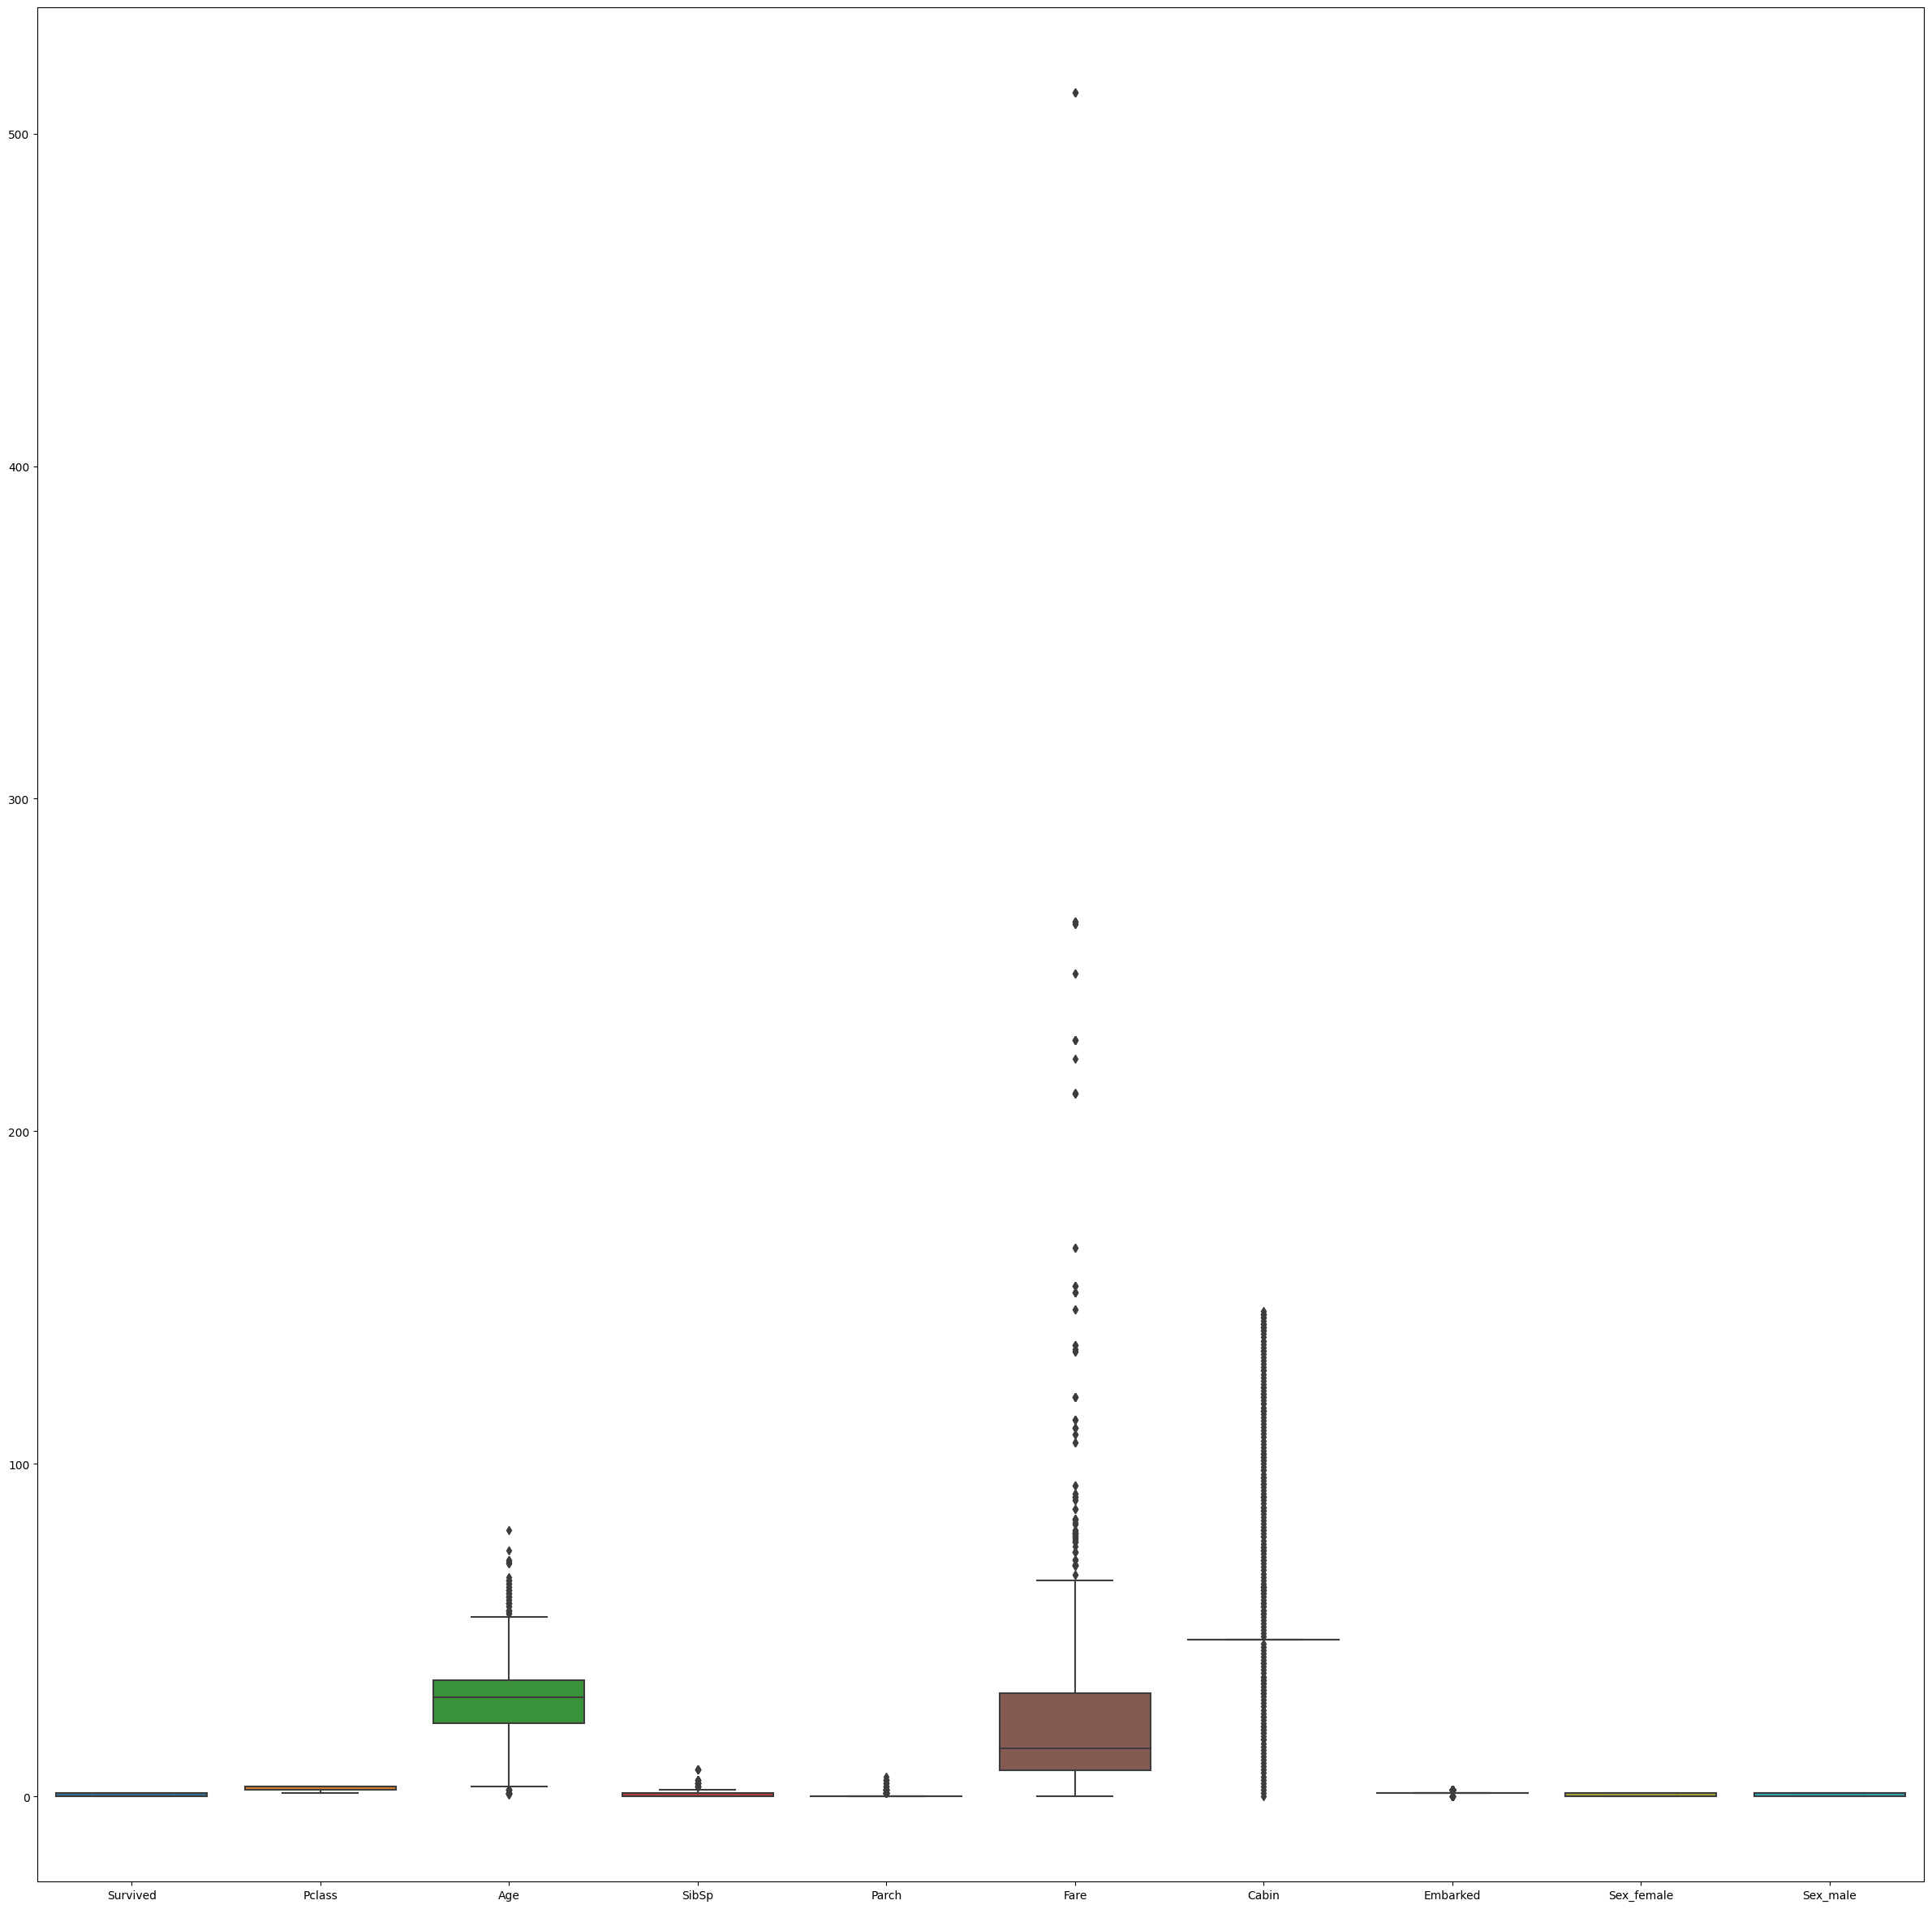

In [107]:
# Cek outlier
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

In [108]:
# Z-Score
columns = ['Age', 'SibSp', 'Parch', 'Fare']

for i in columns:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()

    df[i] = np.where(
        df[i]>upper_limit,
        upper_limit,
        np.where(
            df[i]<lower_limit,
            lower_limit,
            df[i]
        )
    )

<Axes: >

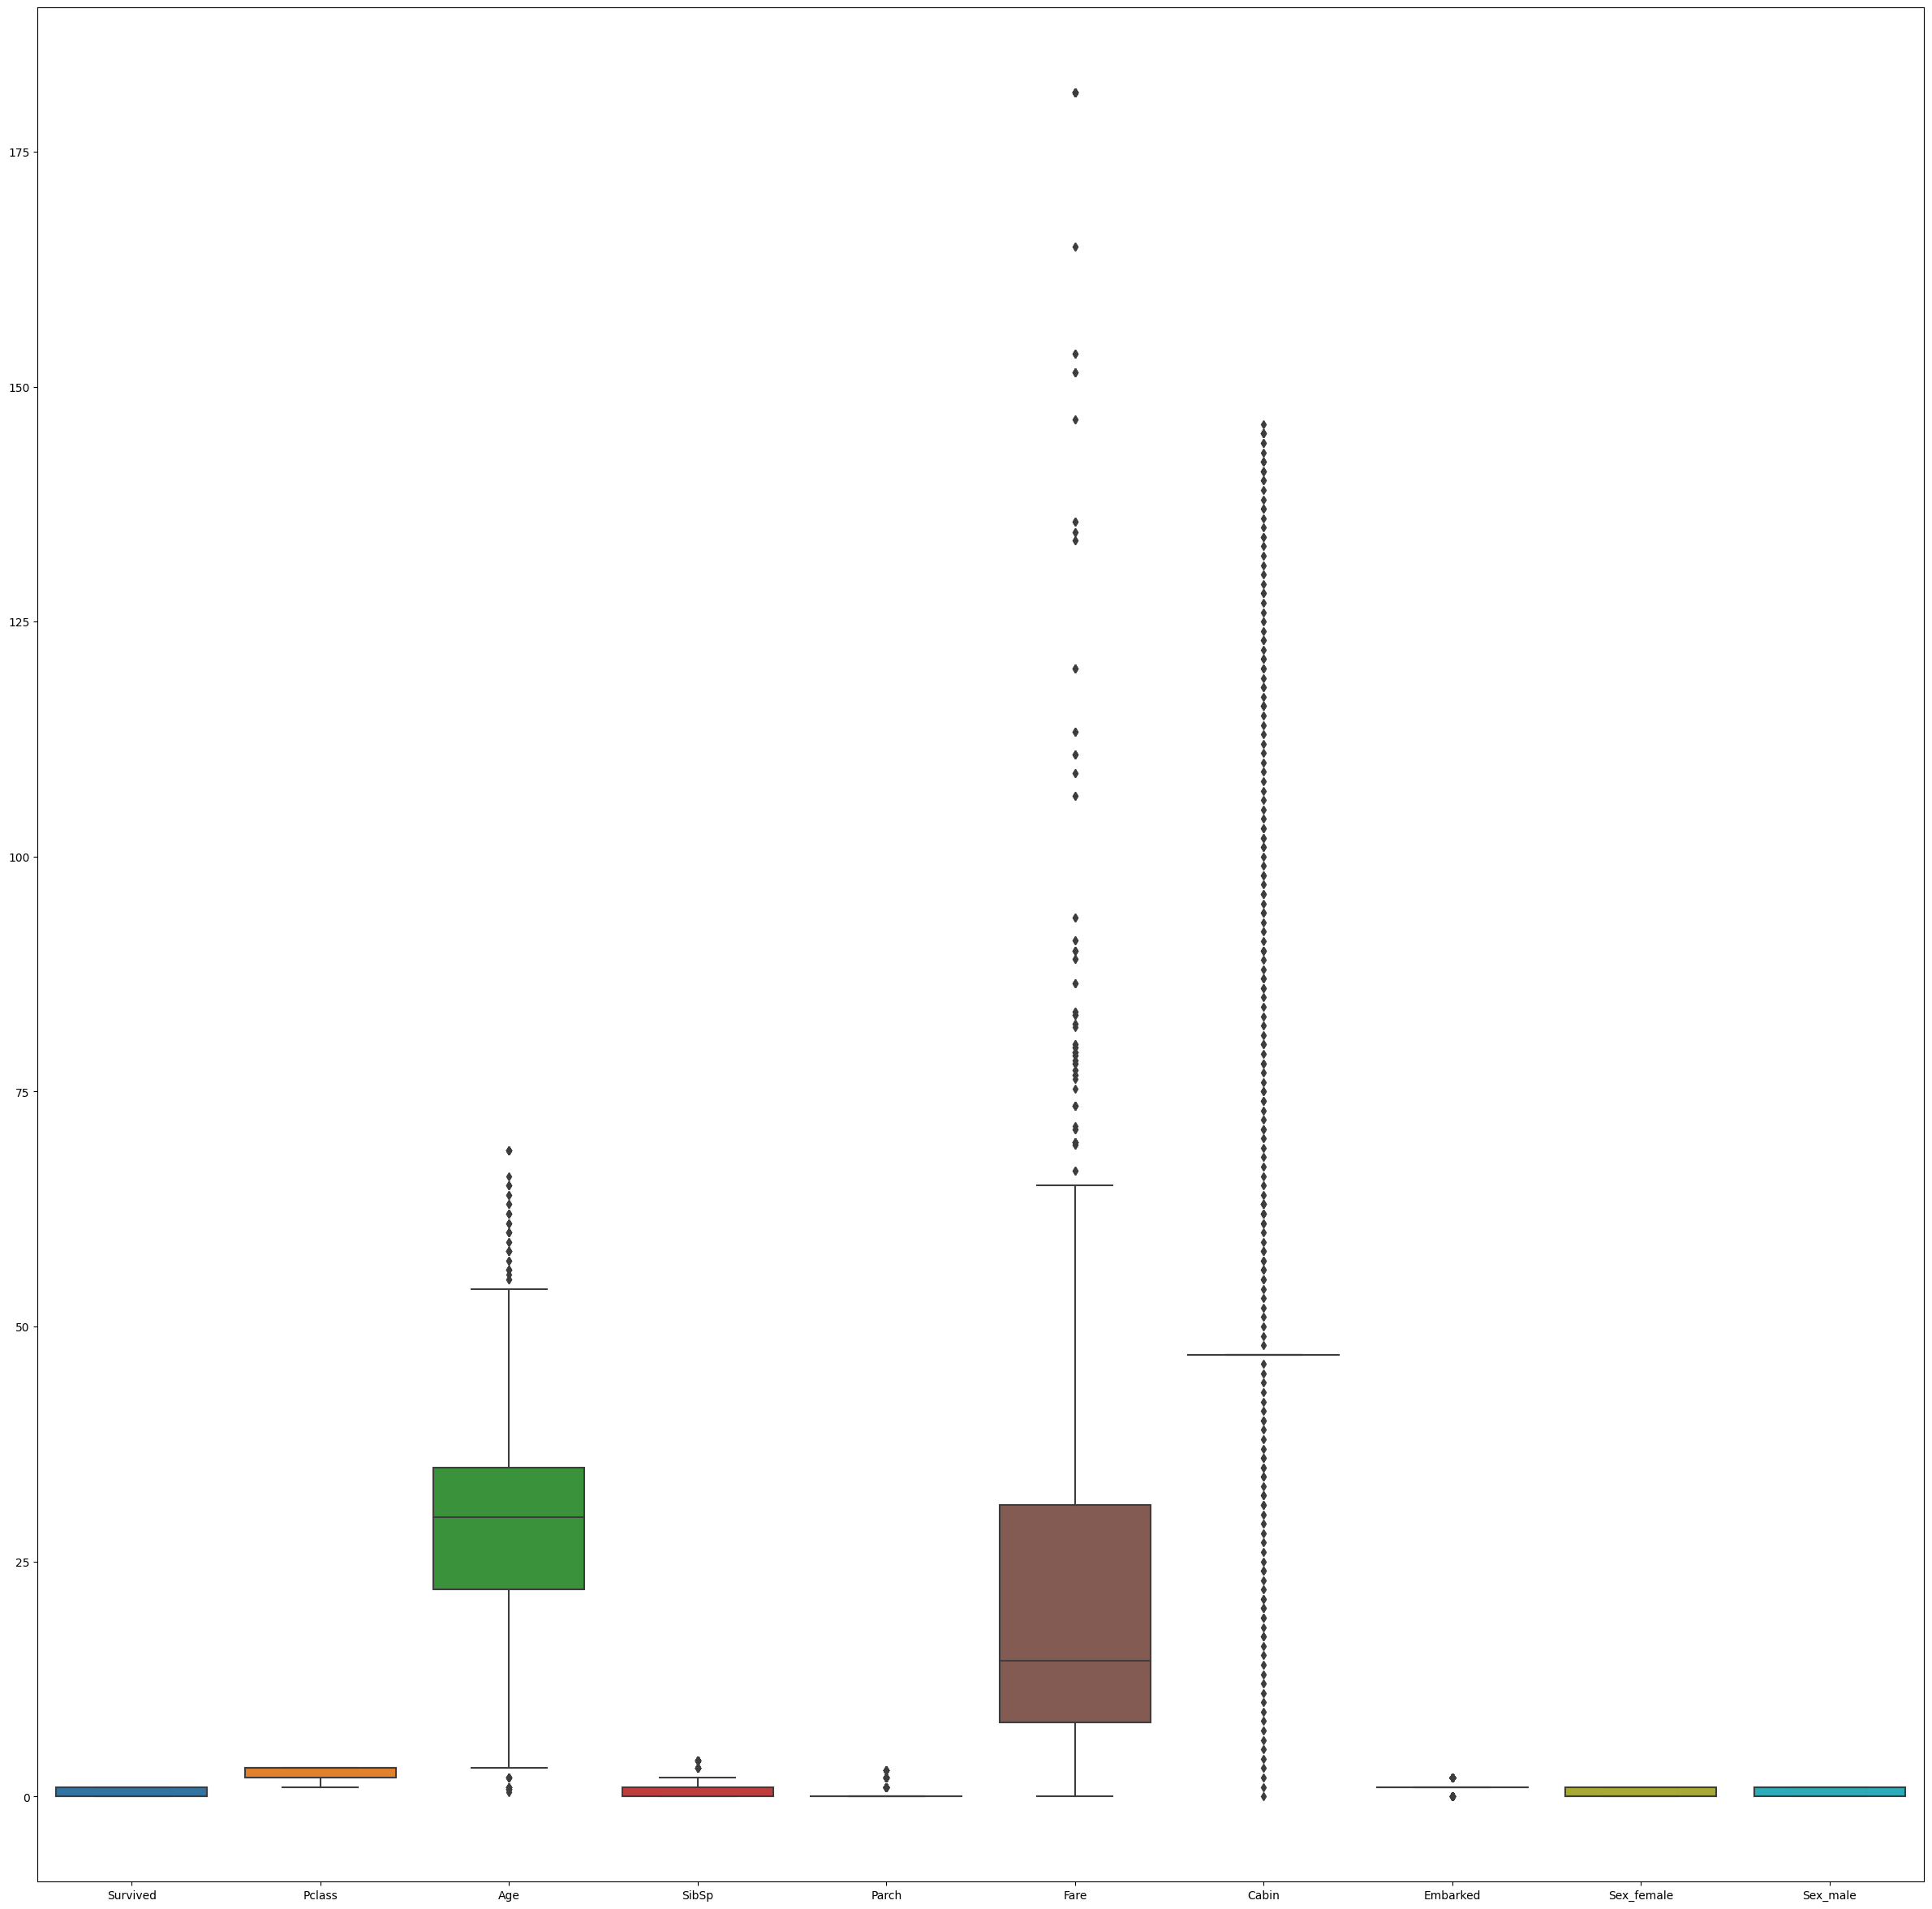

In [109]:
# Cek outlier
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df)

Text(0, 0.5, 'Frequency')

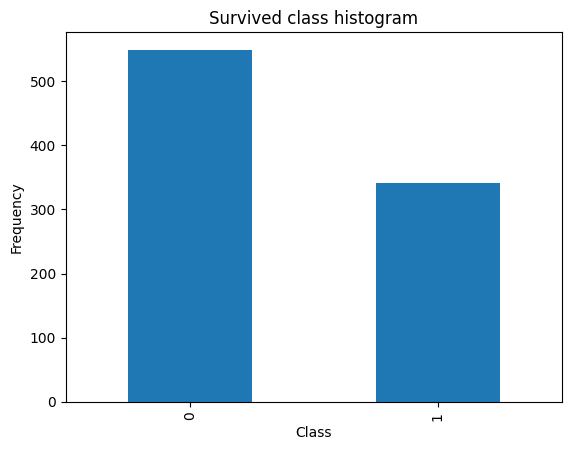

In [110]:
# Imbalance Data
count_classes = pd.value_counts(df['Survived'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Survived class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [111]:
# test split kolom uji
from sklearn.model_selection import train_test_split

In [112]:
# pemisahan kolom tes dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (712, 9)
y_train dataset shape:  (712,)
X_test dataset shape:  (179, 9)
y_test dataset shape:  (179,)


In [113]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [114]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [115]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))

        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")

        nfold += 1

    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.9859550561797753], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.8156424581005587], 1 of KFold 5
DecisionTreeClassifier Recall: [0.7391304347826086], 1 of KFold 5
DecisionTreeClassifier Precission: [0.7727272727272727], 1 of KFold 5
DecisionTreeClassifier AUC: [0.8013833992094862], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.9859550561797753], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.8156424581005587], 2 of KFold 5
DecisionTreeClassifier Recall: [0.7391304347826086], 2 of KFold 5
DecisionTreeClassifier Precission: [0.7727272727272727], 2 of KFold 5
Dec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

----------AFTER------------
LogisticRegression Acc Train: [0.797752808988764, 0.8008415147265077, 0.8036465638148668], 3 of KFold 5
LogisticRegression Acc Test: [0.8100558659217877, 0.8033707865168539, 0.7752808988764045], 3 of KFold 5
LogisticRegression Recall: [0.7391304347826086, 0.7058823529411765, 0.5882352941176471], 3 of KFold 5
LogisticRegression Precission: [0.7611940298507462, 0.7619047619047619, 0.7692307692307693], 3 of KFold 5
LogisticRegression AUC: [0.7968379446640316, 0.7847593582887701, 0.739572192513369], 3 of KFold 5
---------------------------
----------BEFORE------------
LogisticRegression Acc Train: [0.797752808988764, 0.8008415147265077, 0.8036465638148668], 4 of KFold 5
LogisticRegression Acc Test: [0.8100558659217877, 0.8033707865168539, 0.7752808988764045], 4 of KFold 5
LogisticRegression Recall: [0.7391304347826086, 0.7058823529411765, 0.5882352941176471], 4 of KFold 5
LogisticRegression Precission: [0.7611940298507462, 0.7619047619047619, 0.7692307692307693]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------AFTER------------
KNeighborsClassifier Acc Train: [0.8103932584269663], 1 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073], 1 of KFold 5
KNeighborsClassifier Recall: [0.5652173913043478], 1 of KFold 5
KNeighborsClassifier Precission: [0.7222222222222222], 1 of KFold 5
KNeighborsClassifier AUC: [0.7144268774703557], 1 of KFold 5
---------------------------
----------BEFORE------------
KNeighborsClassifier Acc Train: [0.8103932584269663], 2 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073], 2 of KFold 5
KNeighborsClassifier Recall: [0.5652173913043478], 2 of KFold 5
KNeighborsClassifier Precission: [0.7222222222222222], 2 of KFold 5
KNeighborsClassifier AUC: [0.7144268774703557], 2 of KFold 5
---------------------------
----------AFTER------------
KNeighborsClassifier Acc Train: [0.8103932584269663, 0.814866760168303], 2 of KFold 5
KNeighborsClassifier Acc Test: [0.7486033519553073, 0.7471910112359551], 2 of KFold 5
KNeighborsClassifier Recall: [0.565

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------AFTER------------
LinearSVC Acc Train: [0.7654494382022472, 0.7503506311360448, 0.7812061711079944], 3 of KFold 5
LinearSVC Acc Test: [0.7541899441340782, 0.7696629213483146, 0.7528089887640449], 3 of KFold 5
LinearSVC Recall: [0.6231884057971014, 0.45588235294117646, 0.5294117647058824], 3 of KFold 5
LinearSVC Precission: [0.7049180327868853, 0.8857142857142857, 0.75], 3 of KFold 5
LinearSVC AUC: [0.729776021080369, 0.70975935828877, 0.7101604278074866], 3 of KFold 5
---------------------------
----------BEFORE------------
LinearSVC Acc Train: [0.7654494382022472, 0.7503506311360448, 0.7812061711079944], 4 of KFold 5
LinearSVC Acc Test: [0.7541899441340782, 0.7696629213483146, 0.7528089887640449], 4 of KFold 5
LinearSVC Recall: [0.6231884057971014, 0.45588235294117646, 0.5294117647058824], 4 of KFold 5
LinearSVC Precission: [0.7049180327868853, 0.8857142857142857, 0.75], 4 of KFold 5
LinearSVC AUC: [0.729776021080369, 0.70975935828877, 0.7101604278074866], 4 of KFold 5
-----

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


----------AFTER------------
RandomForestClassifier Acc Train: [0.9859550561797753], 1 of KFold 5
RandomForestClassifier Acc Test: [0.8379888268156425], 1 of KFold 5
RandomForestClassifier Recall: [0.7391304347826086], 1 of KFold 5
RandomForestClassifier Precission: [0.8225806451612904], 1 of KFold 5
RandomForestClassifier AUC: [0.8195652173913044], 1 of KFold 5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [0.9859550561797753], 2 of KFold 5
RandomForestClassifier Acc Test: [0.8379888268156425], 2 of KFold 5
RandomForestClassifier Recall: [0.7391304347826086], 2 of KFold 5
RandomForestClassifier Precission: [0.8225806451612904], 2 of KFold 5
RandomForestClassifier AUC: [0.8195652173913044], 2 of KFold 5
---------------------------
----------AFTER------------
RandomForestClassifier Acc Train: [0.9859550561797753, 0.9901823281907434], 2 of KFold 5
RandomForestClassifier Acc Test: [0.8379888268156425, 0.8258426966292135], 2 of KFold 5
RandomFore

In [116]:
# compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
7,GradientBoostingClassifier,0.910773,0.839476,0.836535,0.725149,0.817971,0.071296
6,RandomForestClassifier,0.987373,0.823778,0.791782,0.736829,0.807439,0.163596
9,XGBClassifier,0.975026,0.820382,0.782086,0.736701,0.804614,0.154645
8,ExtraTreesClassifier,0.987934,0.804727,0.758020,0.722251,0.789199,0.183208
1,LogisticRegression,0.803590,0.800213,0.756511,0.707204,0.782568,0.003376
3,GaussianNB,0.789001,0.790132,0.710510,0.762873,0.784914,0.001131
0,DecisionTreeClassifier,0.987934,0.786724,0.717111,0.736871,0.777385,0.201210
2,KNeighborsClassifier,0.813972,0.723878,0.665208,0.573103,0.695517,0.090094
4,SVC,0.700053,0.692449,0.684012,0.368244,0.631303,0.007605
5,LinearSVC,0.670902,0.664321,0.713762,0.553581,0.644046,0.006581


In [117]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

param = dict()
param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

cv = StratifiedKFold(n_splits=5)
clf1 = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clf1.fit(X,y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
600 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.003, 0.005, 0.01, 0.03,
                               0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20,
                               100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=4)

In [118]:
print('Best Score: {}'.format(clf1.best_score_))
print('Best Hyperparameters: {}'.format(clf1.best_params_))

Best Score: 0.794651936476053
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
